<a href="https://colab.research.google.com/github/aa23amd/HYBRID-ML-BASED-SUB-SEASONAL-WEATHER-FORECASTING/blob/main/LSTM_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


importing libraries

In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt




loading and preprocessing training data

In [20]:
import pandas as pd
!unzip -o "/content/drive/MyDrive/train_data.csv.zip" -d /content/

# Update the path to your dataset on Drive.
csv_path = "/content/train_data.csv"
train_df = pd.read_csv(csv_path)

# Load full data again
df = pd.read_csv("/content/train_data.csv")

# Target column
target_column = 'nmme0-tmp2m-34w__nmme0mean'

# Drop unnecessary
df.drop(['startdate', 'climateregions__climateregion'], axis=1, errors='ignore', inplace=True)
df = df[df[target_column].notnull()]

# Features + target
X = df.drop(columns=[target_column])
y = df[target_column]

# Clean
X = X.apply(pd.to_numeric, errors='coerce').fillna(X.median())

# ✅ Train on 4000, test on next 5000
X_train, X_test = X.iloc[:4000], X.iloc[4000:9000]
y_train, y_test = y.iloc[:4000], y.iloc[4000:9000]

# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



Archive:  /content/drive/MyDrive/train_data.csv.zip
  inflating: /content/train_data.csv  


Generator for training LSTM

In [11]:
def sequence_generator(X, y, seq_len, batch_size):
    while True:
        for i in range(0, len(X) - seq_len - batch_size, batch_size):
            batch_X, batch_y = [], []
            for j in range(batch_size):
                batch_X.append(X[i + j:i + j + seq_len])
                batch_y.append(y[i + j + seq_len])
            yield np.array(batch_X), np.array(batch_y)





BUILDING AND TRAINING LSTM

In [22]:
def sequence_generator(X, y, seq_len, batch_size):
    while True:
        for i in range(0, len(X) - seq_len - batch_size, batch_size):
            batch_X, batch_y = [], []
            for j in range(batch_size):
                batch_X.append(X[i + j:i + j + seq_len])
                batch_y.append(y[i + j + seq_len])
            yield np.array(batch_X), np.array(batch_y)

sequence_length = 10
batch_size = 4
steps_per_epoch = (len(X_train_scaled) - sequence_length - batch_size) // batch_size

train_gen = sequence_generator(X_train_scaled, y_train.values, sequence_length, batch_size)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    LSTM(32, input_shape=(sequence_length, X_train_scaled.shape[1]), activation='tanh'),
    Dropout(0.1),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)

model.fit(train_gen, epochs=50, steps_per_epoch=steps_per_epoch, callbacks=[early_stop], verbose=1)






Epoch 1/50
996/996 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 303.4783
Epoch 2/50
996/996 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 10.3511
Epoch 3/50
996/996 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 4.2324
Epoch 4/50
996/996 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 3.2828
Epoch 5/50
996/996 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 3.2354
Epoch 6/50
996/996 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 3.1330
Epoch 7/50
996/996 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 2.8928
Epoch 8/50
996/996 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 2.9733
Epoch 9/50
996/996 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 2.5622
Epoch 10/50
996/996 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 2.6027
Epoch 11/50
996/996 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 2.5460
Epoch 12/50
996/996 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 2.4425
Epoch 13/50
996/996 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 2.4803
Epoch 14/50
996/996 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 2.3458
Epoch 15/50
996/996 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step 

In [ ]:
print(test_df.columns.tolist())


['index', 'lat', 'lon', 'startdate', 'contest-pevpr-sfc-gauss-14d__pevpr', 'nmme0-tmp2m-34w__cancm30', 'nmme0-tmp2m-34w__cancm40', 'nmme0-tmp2m-34w__ccsm30', 'nmme0-tmp2m-34w__ccsm40', 'nmme0-tmp2m-34w__cfsv20', 'nmme0-tmp2m-34w__gfdlflora0', 'nmme0-tmp2m-34w__gfdlflorb0', 'nmme0-tmp2m-34w__gfdl0', 'nmme0-tmp2m-34w__nasa0', 'nmme0-tmp2m-34w__nmme0mean', 'contest-wind-h10-14d__wind-hgt-10', 'nmme-tmp2m-56w__cancm3', 'nmme-tmp2m-56w__cancm4', 'nmme-tmp2m-56w__ccsm3', 'nmme-tmp2m-56w__ccsm4', 'nmme-tmp2m-56w__cfsv2', 'nmme-tmp2m-56w__gfdl', 'nmme-tmp2m-56w__gfdlflora', 'nmme-tmp2m-56w__gfdlflorb', 'nmme-tmp2m-56w__nasa', 'nmme-tmp2m-56w__nmmemean', 'contest-rhum-sig995-14d__rhum', 'nmme-prate-34w__cancm3', 'nmme-prate-34w__cancm4', 'nmme-prate-34w__ccsm3', 'nmme-prate-34w__ccsm4', 'nmme-prate-34w__cfsv2', 'nmme-prate-34w__gfdl', 'nmme-prate-34w__gfdlflora', 'nmme-prate-34w__gfdlflorb', 'nmme-prate-34w__nasa', 'nmme-prate-34w__nmmemean', 'contest-wind-h100-14d__wind-hgt-100', 'nmme0-prate-

evaluation

In [23]:
def create_sequences(X, y, seq_len):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len):
        X_seq.append(X[i:i+seq_len])
        y_seq.append(y[i+seq_len])
    return np.array(X_seq), np.array(y_seq)

X_seq_test, y_seq_test = create_sequences(X_test_scaled, y_test.values, sequence_length)

y_pred_test = model.predict(X_seq_test).flatten()

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_seq_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_seq_test, y_pred_test))
r2 = r2_score(y_seq_test, y_pred_test)

print(f"\n✅ Test MAE (5000 samples): {mae:.4f}")
print(f"✅ Test RMSE: {rmse:.4f}")
print(f"✅ Test R²: {r2:.4f}")



156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step

✅ Test MAE (5000 samples): 1.1621
✅ Test RMSE: 1.5765
✅ Test R²: 0.9586


accuaracy

In [24]:
tolerance = 2.0
accuracy = np.mean(np.abs(y_seq_test - y_pred_test) <= tolerance) * 100
print(f"✅ Accuracy within ±{tolerance}°: {accuracy:.2f}%")


✅ Accuracy within ±2.0°: 83.59%


plots

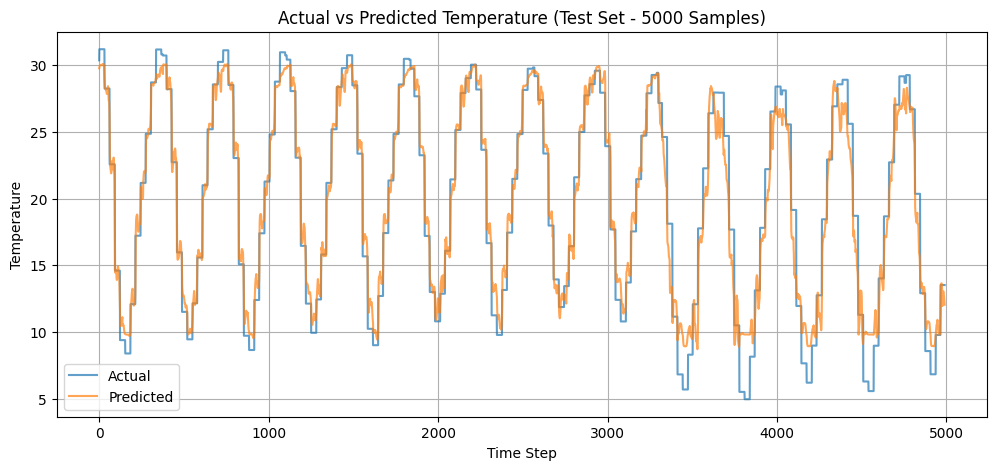

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(y_seq_test, label='Actual', alpha=0.7)
plt.plot(y_pred_test, label='Predicted', alpha=0.7)
plt.title("Actual vs Predicted Temperature (Test Set - 5000 Samples)")
plt.xlabel("Time Step")
plt.ylabel("Temperature")
plt.legend()
plt.grid(True)
plt.show()





This line graph compares the actual temperature values from the test data (blue line) with the predicted values from the LSTM model (orange line) across 5000 samples.

What it shows:
The X-axis represents the time steps (i.e., sample index in the test set).

The Y-axis shows the temperature values.

The blue line is the ground truth — the real temperature data.

The orange line is what your model predicted for those same points.

Why it's useful:
When the two lines are close together, it means the model is predicting accurately.

If there are gaps between them, that's where the model made errors.

Overall, this plot gives a clear picture of how well the model is following the actual temperature trend.



heatmap

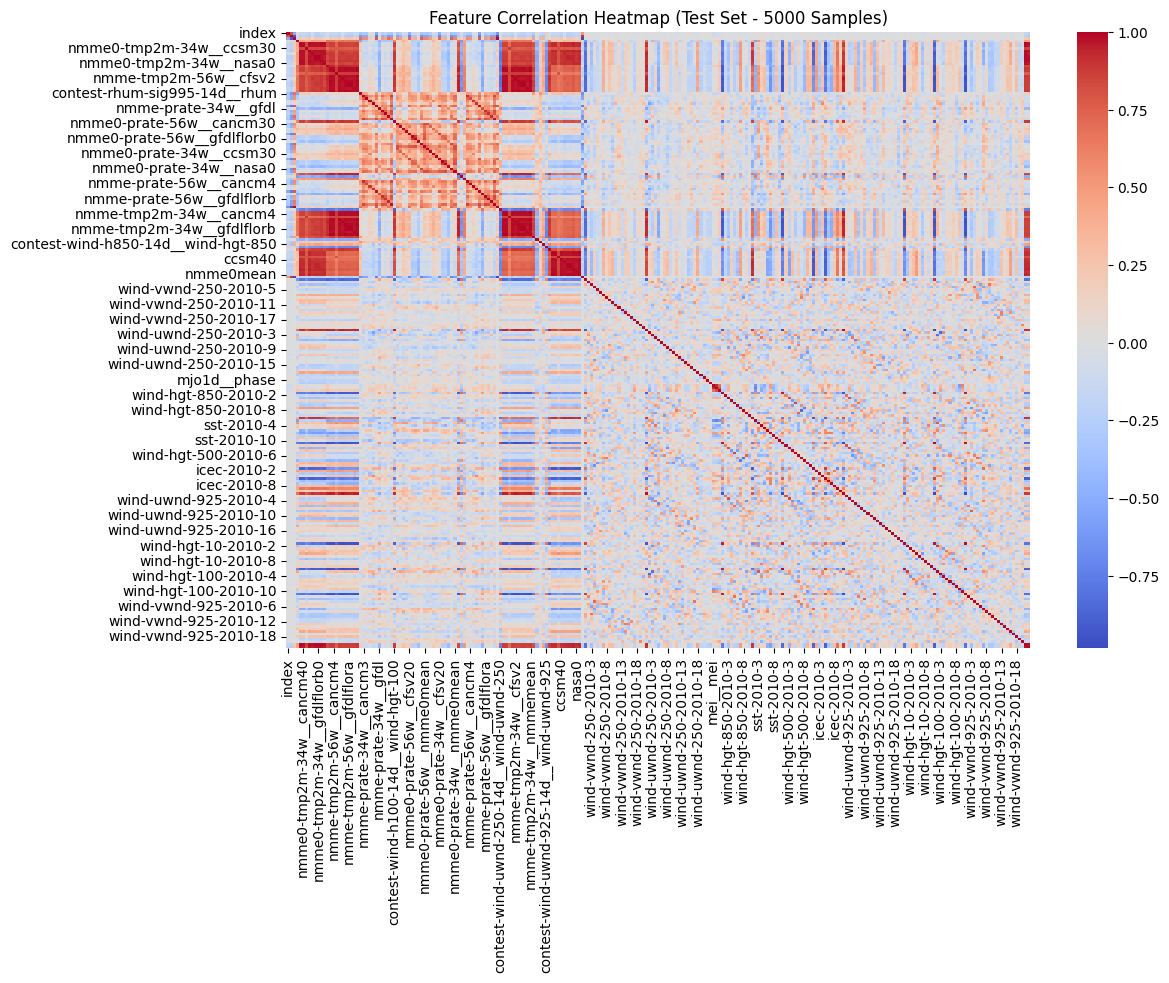

In [27]:
import seaborn as sns

# Rebuild aligned test feature DataFrame for heatmap
test_features_df = X_test.iloc[sequence_length:].copy()  # align with y_seq_test
test_features_df['Actual'] = y_seq_test
test_features_df['Predicted'] = y_pred_test

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = test_features_df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap (Test Set - 5000 Samples)")
plt.show()



This heatmap visualizes the correlation matrix of the test dataset, including all features along with the actual and predicted temperature values.

What it shows
Each square in the heatmap represents the correlation between two variables.

Correlation values range from -1 to +1:

+1 (red): strong positive relationship (both increase together)

-1 (blue): strong negative relationship (one increases while the other decreases)

 0 (white/light): little to no correlation

The more intense the color, the stronger the relationship.

 Why it’s useful:
You can identify which features are most related to the target variable (Actual) — useful for feature selection and model interpretation.

Comparing Predicted vs Actual gives insight into the model's ability to learn real relationships.

A high correlation between Actual and Predicted means your model is performing well.

If a feature has high correlation with both Actual and Predicted, it's likely the model is using it effectively.

This heatmap is a powerful way to show that your model is not predicting blindly, but actually capturing relationships that exist in the real data.



histogram

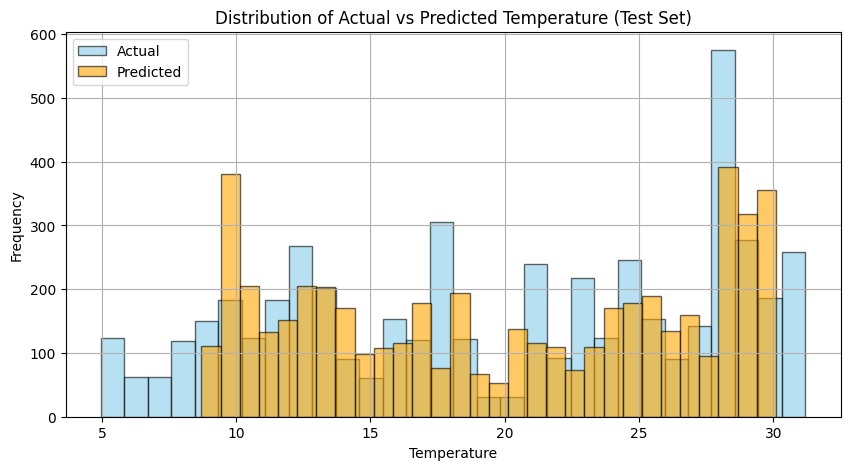

In [26]:
plt.figure(figsize=(10, 5))
plt.hist(y_seq_test, bins=30, alpha=0.6, label="Actual", color="skyblue", edgecolor='black')
plt.hist(y_pred_test, bins=30, alpha=0.6, label="Predicted", color="orange", edgecolor='black')
plt.title("Distribution of Actual vs Predicted Temperature (Test Set)")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()



The X-axis represents the temperature values, grouped into bins (e.g., 10–12°C, 12–14°C, etc.).

The Y-axis shows how many times each temperature range appears (i.e., frequency).

The blue bars show the real temperature distribution from the test data.

The orange bars show how the predicted temperatures are distributed.

Why it's useful:
If the orange bars closely match the blue bars in shape and height, it means your model is predicting temperature values in the correct ranges.

Any major shift or mismatch would indicate the model is biased or missing certain ranges.

This plot visually confirms that the model isn't just predicting well on average — it's capturing the overall shape and spread of temperature values in real data, which supports strong generalization.

residual plot

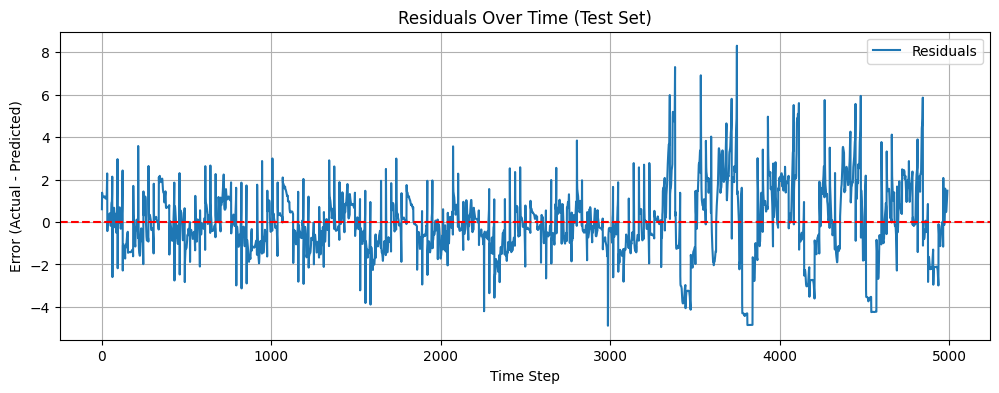

In [28]:
residuals = y_seq_test - y_pred_test

plt.figure(figsize=(12, 4))
plt.plot(residuals, label="Residuals")
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals Over Time (Test Set)")
plt.xlabel("Time Step")
plt.ylabel("Error (Actual - Predicted)")
plt.legend()
plt.grid(True)
plt.show()


This plot shows the residuals, which are the errors made by your model on the test data. A residual is calculated as:

Residual = Actual Value – Predicted Value

What it shows:
The X-axis represents time steps (i.e., sample index in the test set).

The Y-axis shows the size of the prediction error for each point.

The blue line shows the residuals.

The red dashed line at 0 indicates perfect predictions (no error).

 Why it’s useful:
Points close to 0 mean the prediction was accurate.

Points above 0 = model underpredicted (actual > predicted).

Points below 0 = model overpredicted (actual < predicted).

If residuals are randomly scattered around zero, it indicates the model is doing a good job.

If there’s a pattern, it might suggest a bias or a missing trend in the model.

This plot is important for diagnosing whether the model is making systematic errors and for validating the stability of your predictions over time.

